# PYMACEUTICALS, INC. Assignment

In [1]:
# List out the dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Prepare the study data frames
mouse_metadata_file = r"C:\Users\emich\Desktop\penn data science bootcamp\Mod5_Assignment\pymaceuticals-code\module_5_starter_code\Pymaceuticals\data\Mouse_metadata.csv"
study_results_file = r"C:\Users\emich\Desktop\penn data science bootcamp\Mod5_Assignment\pymaceuticals-code\module_5_starter_code\Pymaceuticals\data\Study_results.csv"

# Read the mouse data and study results
mouse_metadata = pd.read_csv(mouse_metadata_file)
study_results = pd.read_csv(study_results_file)

In [2]:
# Merge the two DataFrames into DataFrames
merged_dataframe = pd.merge(mouse_metadata, study_results, how= 'outer')

In [3]:
# Display the data table for preview
merged_dataframe.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Display the number of unique mice IDs
mice=merged_dataframe["Mouse ID"].value_counts()
number_of_mice=len(mice)
number_of_mice

249

In [5]:
# Check for any duplicates of Mouse ID and Timepoint
duplicate_mice = merged_dataframe.loc[merged_dataframe.duplicated(subset=['Mouse ID', 'Timepoint',]), 'Mouse ID'].unique()

In [6]:
# Display the duplicate data for the Mouse ID
all_duplicated_mouse_id=pd.DataFrame(duplicate_mice)
all_duplicated_mouse_id

,0
0,g989


In [7]:
# Create a cleaned DataFrame where the duplicate mouse ID is removed
clean_df = merged_dataframe[merged_dataframe['Mouse ID'].isin(duplicate_mice)==False]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Check on the number of mice in the cleaned DataFrame
cleaned_mice=clean_df["Mouse ID"].value_counts()
clean_number_of_mice=len(cleaned_mice)
clean_number_of_mice

248

## SUMMARY STATISTICS

- Refer to cleaned data for the rest of the assignment
- Create a dataframe that displays a summary statistics table which includes a row for each drug regimen and columns for mean, median, variance, standard deviation and SEM of the tumor volume.


In [9]:
# Use the groupby and summary statistical methods to calculate the following properties of each drug regimen
# mean, median, variance, standard deviation, and SEM of the tumor volume.

mean = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
median = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()
var = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).var()
std = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).std()
sem = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem()

summary_statistics = pd.DataFrame({"Mean Tumor Volume": mean,
                                  "Median Tumor Volume": median,
                                  "Tumor Volume Variance": var,
                                  "Tumor Volume Std. Dev.": std,
                                  "Tumor Volume Std. Dev. Err.": sem})

# Display the summary statistics table which is grouped by 'Drug Regimen' in he column
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Dev. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of the mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen used
#stat = ['mean', 'median', 'var', 'std', 'sem']
# Use the aggregation method and produce the same statistics table in a sigle line

summary_agg = clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Creating the Bar and Pie Charts

- Generate a bar plot showing the toal number of timepoints for all mice tested for each drug regimen using Pandas 
- Generate a bar plot which shows the total number of timepoints for all mice tested for each drug regimen using Pyplot
- Generate a pie plot which shows the distribution of female vs. male mice using Pandas
- Generate a pie plot showing the distribution of female vs. male mice using Pyplot

In [11]:
# Create a group series using the 'Drug Regimen' column and count the number of data ponts for each drug regimen.

mice_count = clean_df["Drug Regimen"].value_counts()
mice_count

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

Text(0.5, 1.0, 'Number of Mice Per Treatment')

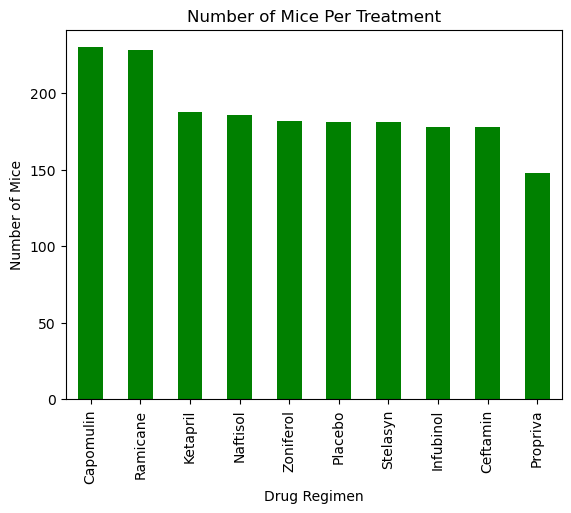

In [12]:
# Create a Pandas bar plot utilizing the group series above and format it
plot_pandas = mice_count.plot.bar(color='g')

# Set the labels for xlabel, ylabel, and title the plot
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice Per Treatment")

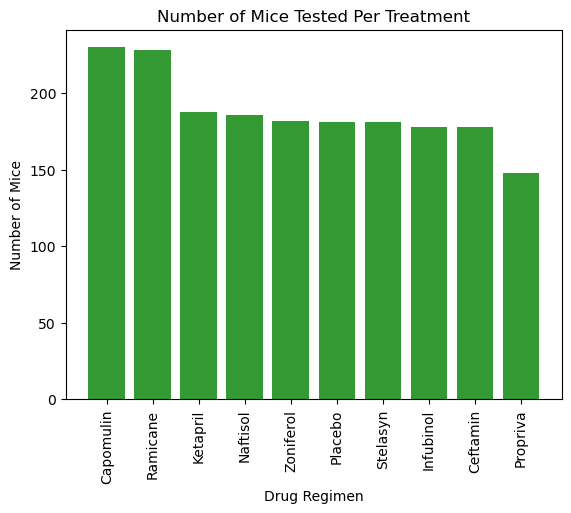

In [13]:
# Generate a bar plot which shows the totala number of UNIQUE mice that were tesed on each drug regimen using pyplot.

x_axis = mice_count.index.values
y_axis = mice_count.values

# Create a PyPlot bar plot utilizing the group series above and format it

plt.bar(x_axis, y_axis, color='g', alpha=0.8, align='center')

# Set the labels for the xlabel, ylabel and title the plot

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice Tested Per Treatment")
plt.xticks(rotation="vertical")

plt.show()

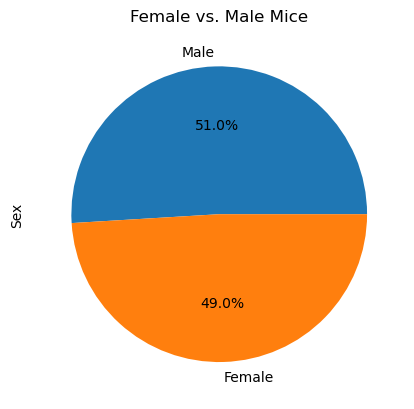

In [14]:
# Create a pie plot showing the distribution of female versus male mice using Pandas.

gender_data = clean_df["Sex"].value_counts()
plt.title("Female vs. Male Mice")
gender_data.plot.pie(autopct= "%1.1f%%")

plt.show()

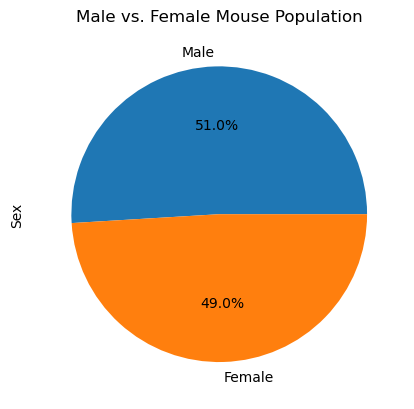

In [15]:
# Create a pie plot showing the distribution of female versus male mice using PyPlot.

labels = ['Female', 'Male']
sizes = [49.7999197, 50.200803]
plot = gender_data.plot.pie(y= 'Total Count', autopct= "%1.1f%%")
plt.title("Male vs. Female Mouse Population")
plt.ylabel('Sex')

plt.show()

## Calculating Quartiles, Find Outliers, and Creating a Box Plot

- Generate a DataFrame that has the last timepoint for each mouse ID created using the 'groupby' function
- Reset the index of the DataFrame
- Retrieve the maximum timepoint of each mouse
- List out the four treatment groups (Capomulin, Ramicane, Infubinol, and Ceftamin)
- Create an empty list to fill with tumor volume data
- Create a for loop to display the interquartile range (IQR) and the outliers for each treatment group
- Create a box plot to show the distribution of the final tumor volume for all the mice in each treatment group

In [16]:
# Calculate the final tumor volume for each mouse across the four treatment regimens listed above.
# Capomulin, Ramicane, Infubinol, and Ceftamin

Capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin", :]
Ramicane_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :]

In [17]:
# To start, gather the last timepoint for each mouse (the greatest)
# Capomulin

Capomulin_final = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_final)
Capomulin_merge = pd.merge(Capomulin_vol, clean_df, on=("Mouse ID", "Timepoint"), how= "left")
Capomulin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [18]:
Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]

quartiles = Capomulin_tumors.quantile([0.25, 0.5, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [19]:
# Merge this group df with the original dataframe to gather the information of the tumor volume at the last time pont

Ramicane_final = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_final)
Ramicane_merge = pd.merge(Ramicane_vol, clean_df, on=("Mouse ID", "Timepoint"), how="left")
Ramicane_merge.head()
Ramicane_merge.to_csv("output.csv")
Ramicane_tumors = Ramicane_merge["Tumor Volume (mm3)"]

quartiles =Ramicane_tumors.quantile([0.25, 0.5, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of Ramicane tumor is: {lowerq}")
print(f"The upper quartile of Ramicane tumor is: {upperq}")
print(f"The interquartile range of Ramicane tumor is: {iqr}")
print(f"The median of Ramicane tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane tumor is: 31.56046955
The upper quartile of Ramicane tumor is: 40.65900627
The interquartile range of Ramicane tumor is: 9.098536719999998
The median of Ramicane tumors is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [20]:
# Infubinol treatment
# Determine the outliers using the upper and lower bounds

Infubinol_final = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_final)
Infubinol_merge = pd.merge(Infubinol_vol, clean_df, on=("Mouse ID", "Timepoint"), how="left")
Infubinol_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [21]:
Infubinol_tumors = Infubinol_merge["Tumor Volume (mm3)"]

quartiles =Infubinol_tumors.quantile([0.25, 0.5, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of Infubinol tumor is: {lowerq}")
print(f"The upper quartile of Infubinol tumor is: {upperq}")
print(f"The interquartile range of Infubinol tumor is: {iqr}")
print(f"The median of Infubinol tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
Infubinol_merge.to_csv("output.csv")

The lower quartile of Infubinol tumor is: 54.04860769
The upper quartile of Infubinol tumor is: 65.52574285
The interquartile range of Infubinol tumor is: 11.477135160000003
The median of Infubinol tumors is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [22]:
# Ceftamin treatment

Ceftamin_final = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_final)
Ceftamin_merge = pd.merge(Ceftamin_vol, clean_df, on=("Mouse ID", "Timepoint"), how="left")
Ceftamin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [23]:
# Calculate the quartiles for Ceftamin as well as the IQR
# Determine its outliers using the upper and lower bounds

Ceftamin_tumors = Ceftamin_merge["Tumor Volume (mm3)"]

quartiles =Ceftamin_tumors.quantile([0.25, 0.5, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of treatment is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of treatment is: 48.72207785
The upper quartile of temperatures is: 64.29983003
The interquartile range of temperatures is: 15.577752179999997
The median of temperatures is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


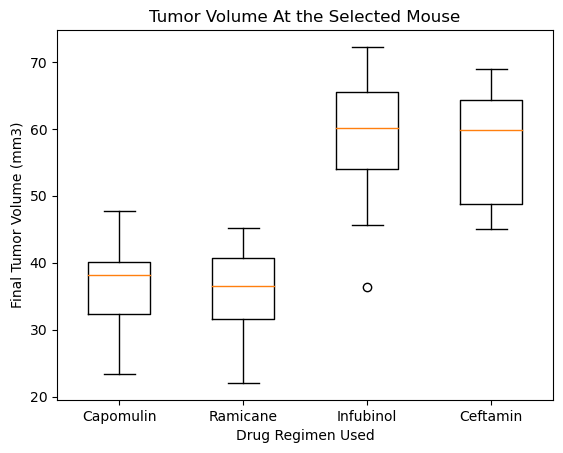

In [24]:
# Create a box plot of the final tumor volume of each mouse across the four regimens of interest.

data_to_plot = [Capomulin_tumors, Ramicane_tumors, Infubinol_tumors, Ceftamin_tumors]
Regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

#data_to_plot = data_to_plot.values
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume At the Selected Mouse')
ax1.set_xlabel('Drug Regimen Used')
ax1.set_ylabel('Final Tumor Volume (mm3)')

ax1.boxplot(data_to_plot, labels=Regimen, widths = 0.5, vert=True)
plt.show()

In [25]:
# Calculate the final tumor volume of each mouse across the four treatment regimens.
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Merge the group df with the orignal dataframe in order to get the tumor volume at the last timepoint

drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugs = merged_dataframe[merged_dataframe["Drug Regimen"].isin(drug_list)]
drugs.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [26]:
# Gather the last timepoint for each mouse (greatest)

last_timepoint = drugs.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size =("Tumor Volume (mm3)", lambda x: x.iloc[-1]))

# Re-shape the dataframe
last_timepoint = last_timepoint.stack(level=0).unstack(level=0)
for drug in drug_list:
    print(drug)

Capomulin
Ramicane
Infubinol
Ceftamin


In [27]:
# Gather the treatments in a list for a for loop
# Create an empty list to fill with tumor volume data (to be plotted)
# Calculate the IQR and determine if there are any potential outliers
# Locate the rows which contain the mice on each drug and gather the tumo volumes (add subset)
# Determine the outliers using upper and lower bounds

treatment = 0
for drug in drug_list:
    quartiles = last_timepoint[drug].quantile([0.25, 0.5, 0.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq, 2)
    lower_bound = round(lowerq - (1.5*iqr), 2)
    upper_bound = round(upperq + (1.5*iqr), 2)
    
    if treatment == 0:
        print(f"-----------------------------------------------------")
    print(f"The lower quartile of {drug} treatments is: {lowerq}")
    print(f"The upper quartile of {drug} treatments is: {upperq}")
    print(f"The interquartile range of {drug} treatments is: {iqr}")
    print(f"Values below {lower_bound} could be {drug} outliers.")
    print(f"Values above {upper_bound} could be {drug} outliers.")
    print(f"--------------------------------------------")
    treatment+=1

-----------------------------------------------------
The lower quartile of Capomulin treatments is: 32.38
The upper quartile of Capomulin treatments is: 40.16
The interquartile range of Capomulin treatments is: 7.78
Values below 20.71 could be Capomulin outliers.
Values above 51.83 could be Capomulin outliers.
--------------------------------------------
The lower quartile of Ramicane treatments is: 31.56
The upper quartile of Ramicane treatments is: 40.66
The interquartile range of Ramicane treatments is: 9.1
Values below 17.91 could be Ramicane outliers.
Values above 54.31 could be Ramicane outliers.
--------------------------------------------
The lower quartile of Infubinol treatments is: 54.05
The upper quartile of Infubinol treatments is: 65.53
The interquartile range of Infubinol treatments is: 11.48
Values below 36.83 could be Infubinol outliers.
Values above 82.75 could be Infubinol outliers.
--------------------------------------------
The lower quartile of Ceftamin treatmen

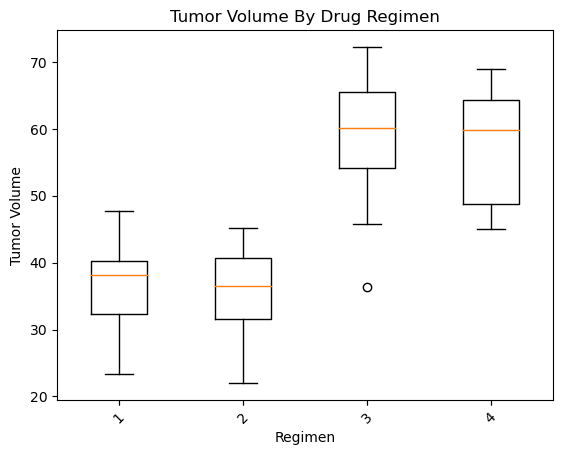

In [28]:
boxplot_list = []
for drug in drug_list:
    boxplot_list.append(list(last_timepoint[drug].dropna()))
    
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig = plt.figure()
plt.title("Tumor Volume By Drug Regimen")
plt.xlabel("Regimen")
plt.xticks([1, 2, 3, 4], drug_list, rotation=45)
plt.ylabel("Tumor Volume")
plt.boxplot(boxplot_list)
plt.show()

## Creating Line and Scatter Plots

- Create a line plot tht shows the tumor volume versus time point for one mouse treatment with Capomulin
- Create a scatter plot is generated showing the average tumor volume versus mouse weight for the Capomulin regimen

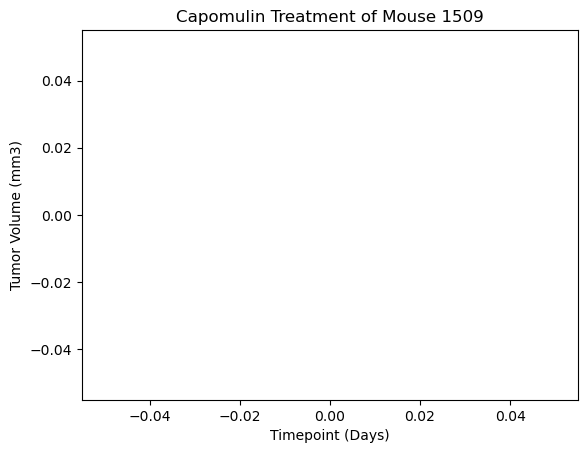

In [45]:
# Generate a line plot of the tumor volume versus time point for a mouse treated with Capomulin

# Identify data points of a mouse treated with Capomulin
forline_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == '1509']
forline_df.head()
x_axis = forline_df["Timepoint"]
tumor_size = forline_df["Tumor Volume (mm3)"]


# Plot the line chart with the time values on the x-axis and the tumor volume values on the y-axis
# marker = 'o' adds circles on each data point for visibility

# Add the labels and title to the plot
fig1, ax1 = plt.subplots()
plt.title('Capomulin Treatment of Mouse 1509')
plt.plot(x_axis, tumor_size, linewidth=2, markersize=15, marker="o", color="blue", label="Fahrenheit")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

# Display the plot
plt.show()

Text(0, 0.5, 'Average Tumor Volume (mm3)')

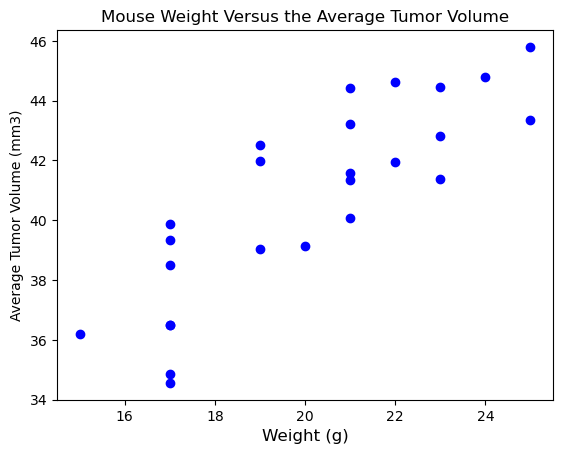

In [30]:
# Generate a scatter plot of average tumor volume versus mouse weight for he Capomulin regimen
fig1, ax1 = plt.subplots()
avg_cap_vol = Capomulin_df.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(avg_cap_vol['Weight (g)'], avg_cap_vol['Tumor Volume (mm3)'], color = "blue")
plt.title('Mouse Weight Versus the Average Tumor Volume')
plt.xlabel('Weight (g)', fontsize = 12)
plt.ylabel('Average Tumor Volume (mm3)')

## Calculating Correlation and Regression

- Find the correlation coefficient and linear regression model for the mouse weight and average tumor volume for the Capomulin regimen.

In [35]:
# Calculate the correlation coefficient and regression model for he mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(avg_cap_vol['Weight (g)'], avg_cap_vol['Tumor Volume (mm3)'])
print(f"The correlation beween mouse weight and the average tumor volume is {round(correlation[0], 2)}")

The correlation beween mouse weight and the average tumor volume is 0.84


The r-squared is: 0.709


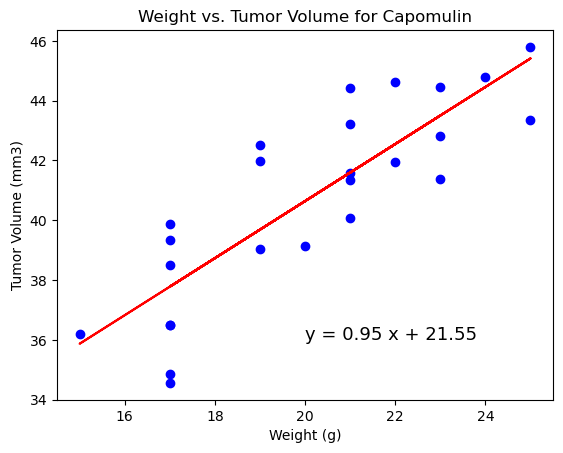

In [34]:
# Add the linear regression equation and line to plot
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept,rvalue, pvalue, stderr)= linregress(avg_cap_vol["Weight (g)"], avg_cap_vol["Tumor Volume (mm3)"])
regress_values = avg_cap_vol["Weight (g)"]* slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(avg_cap_vol["Weight (g)"], avg_cap_vol["Tumor Volume (mm3)"], color="b")
plt.plot(avg_cap_vol["Weight (g)"], regress_values, color= "red")
plt.title("Weight vs. Tumor Volume for Capomulin")
plt.annotate(line_eq, (20,36), fontsize = 13)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
print(f"The r-squared is: {round(rvalue**2, 3)}")
plt.show()

## Final Analysis.

- Based on the final graph above (Weight vs. Tumor Volume for Capomulin), it can be inferred that weight size is positively correlated with average tumor volume under the Capomulin treatment regimen. 
- However, in comparison to the other three treatment regimens (Ramicane, Infubinol, and Ceftamin), it can be inferred that the use of Capomulin treatment regimen was more effective in decreasing tumor size than the use of Infubinol and Ceftamin. (Refer to box plot 2 titled "Tumor Volume by Treatment Regimen")